EDA On Gym/Fitness Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gym_data=pd.read_csv('gym_members_exercise_tracking_dirty.csv')
gym_data.isnull().sum()


Age                               0
Gender                            0
Weight (kg)                      29
Height (m)                       29
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                  29
Workout_Type                     29
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
dtype: int64

In [3]:
gym_data.describe()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.00000,944.000000,944.000000,973.000000,973.000000,973.000000,973.000000,944.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.27852,73.960593,1.720413,179.883864,143.766701,62.223022,1.499538,905.698093,24.976773,2.626619,3.321686,1.809866,25.886763
std,12.57355,21.173450,0.126639,11.525686,14.345101,7.327060,2.420204,272.352621,6.259419,0.600172,0.913047,0.739693,11.651920
min,5.00000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.00000,58.200000,1.620000,170.000000,131.000000,56.000000,1.040000,723.750000,21.300000,2.200000,3.000000,1.000000,20.160000
50%,39.00000,70.050000,1.710000,180.000000,143.000000,62.000000,1.270000,892.000000,26.200000,2.600000,3.000000,2.000000,24.220000
75%,49.00000,86.200000,1.800000,190.000000,156.000000,68.000000,1.460000,1074.250000,29.300000,3.100000,4.000000,2.000000,28.780000
max,59.00000,129.900000,2.000000,199.000000,169.000000,74.000000,25.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,120.000000


In [4]:
gym_data.drop(columns=['Experience_Level'],inplace=True)

In [5]:
gym_data.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
BMI                              float64
dtype: object

In [6]:
gym_data['Water_Intake (liters)']=gym_data['Water_Intake (liters)'].astype(int)


In [7]:
gym_data['Session_Duration (hours)']=gym_data['Session_Duration (hours)'].astype(int)


Check Invalids

In [8]:

gym_data[gym_data["Age"].between(15, 80) == False]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
69,5,Male,106.5,1.65,162,162,74,1,1176.0,HIIT,21.0,3,4,39.12
127,5,Female,57.3,1.79,175,166,62,1,1479.0,Yoga,17.8,2,4,17.88
362,5,Female,50.6,1.68,193,145,64,1,877.0,Yoga,30.6,2,3,17.93
516,5,Female,74.8,1.69,175,162,53,1,933.0,Strength,32.8,2,4,26.19
553,5,Female,70.7,1.68,192,121,66,1,637.0,Cardio,34.9,1,3,25.05
717,5,Female,70.8,1.62,166,162,68,0,394.0,Strength,26.0,1,3,26.98
726,5,Male,NaN,1.78,165,149,65,1,929.0,Yoga,24.7,2,3,14.87
893,5,Female,70.4,1.55,160,143,58,0,470.0,Strength,29.9,2,2,29.30
915,5,Male,73.1,1.83,194,131,71,1,681.0,Yoga,28.0,2,4,21.83
961,5,Female,66.6,1.67,184,137,71,1,699.0,Yoga,31.0,1,4,23.88


In [9]:
gym_data[gym_data["Session_Duration (hours)"].between(0.5, 6) == False]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
3,25,Male,53.2,1.70,190,164,56,0,532.0,Strength,28.8,2,3,18.41
4,38,Male,46.1,1.79,188,158,68,0,556.0,Strength,29.2,2,3,14.39
10,41,Male,120.8,1.67,188,146,54,0,593.0,HIIT,20.5,3,2,43.31
23,29,Male,120.9,1.78,197,168,65,0,721.0,Yoga,28.1,3,2,38.16
26,44,Male,65.2,1.80,192,139,68,0,502.0,HIIT,27.2,2,2,20.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,36,Female,59.1,1.78,184,121,60,0,514.0,Cardio,34.5,2,2,18.65
939,31,Female,53.3,1.64,183,141,70,0,402.0,Strength,29.4,2,3,19.82
958,34,Female,66.5,1.69,191,157,52,0,636.0,Cardio,28.1,2,3,23.28
965,23,Female,44.1,1.62,196,122,58,0,354.0,Yoga,25.7,2,2,16.80


In [10]:
gym_data[gym_data["BMI"]>60]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
133,21,Male,NaN,1.66,196,159,60,1,1207.0,HIIT,29.8,3,3,120.0
680,27,Male,61.6,1.80,169,144,72,1,1172.0,Yoga,26.4,3,2,120.0
756,20,Female,46.5,1.68,187,145,72,0,660.0,HIIT,27.9,2,2,120.0
778,43,Female,53.8,1.72,173,160,71,1,742.0,Strength,30.2,2,4,120.0
785,43,Male,94.0,1.79,187,156,62,1,1012.0,HIIT,23.2,3,2,120.0
823,27,Male,76.7,1.70,196,150,56,0,792.0,HIIT,29.1,2,3,120.0
887,55,Male,52.1,1.68,180,167,50,0,637.0,Yoga,23.6,3,3,120.0
889,28,Male,NaN,1.78,164,134,68,1,951.0,HIIT,24.9,3,4,120.0
892,20,Male,85.7,NaN,172,136,58,1,1287.0,Cardio,10.5,3,5,120.0
942,42,Male,86.3,1.77,172,127,55,1,1113.0,HIIT,11.4,3,4,120.0


Filling Missing Values And Handling Messy Data

In [11]:
for col in ["Weight (kg)", "Height (m)", "Calories_Burned"]:
    gym_data[col] = gym_data[col].fillna(gym_data[col].median())

gym_data['Workout_Type'] = gym_data['Workout_Type'].fillna(gym_data['Workout_Type'].mode()[0])

gym_data=gym_data[gym_data['Session_Duration (hours)'].between(0.1,8)]

gym_data=gym_data[gym_data['Age'].between(12,80)]
gym_data=gym_data[gym_data['BMI']<=60]

gym_data.isnull().sum()




Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

In [12]:
gym_data['Calories_Burned']=gym_data['Calories_Burned'].astype(int)

In [13]:
gym_data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,38.694626,73.880079,1.718585,179.847969,144.205767,62.154653,1.001311,988.688073,24.371035,2.175623,3.526868,24.945727
std,12.128893,20.458874,0.126006,11.454599,14.358491,7.305640,0.036202,221.066936,6.574672,0.640360,0.866555,6.451451
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,1.000000,576.000000,10.000000,1.000000,2.000000,12.320000
25%,28.000000,58.850000,1.620000,170.000000,132.000000,56.000000,1.000000,831.000000,20.200000,2.000000,3.000000,20.550000
50%,40.000000,70.050000,1.710000,180.000000,144.000000,62.000000,1.000000,948.000000,25.700000,2.000000,4.000000,24.250000
75%,49.000000,85.700000,1.790000,189.500000,156.000000,68.000000,1.000000,1123.000000,29.100000,3.000000,4.000000,28.490000
max,59.000000,129.500000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.000000,5.000000,49.840000


Creating BMI Category

In [14]:
def bmi_category(BMI):
    if BMI < 18.5:
        return "Underweight"
    elif BMI < 25:
        return "Normal"
    elif BMI < 30:
        return "Overweight"
    else:
        return "Obese"

gym_data["BMI_Category"] = gym_data["BMI"].apply(bmi_category)


In [15]:
gym_data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,BMI_Category
0,56,Male,88.3,1.71,180,157,60,1,1313,Yoga,12.6,3,4,30.20,Obese
1,46,Female,74.9,1.53,179,151,66,1,883,HIIT,33.9,2,4,32.00,Obese
2,32,Female,68.1,1.66,167,122,54,1,677,Cardio,33.4,2,4,24.71,Normal
5,56,Female,58.0,1.68,168,156,74,1,1116,HIIT,15.5,2,5,20.55,Normal
6,36,Male,70.3,1.72,174,169,73,1,1385,Cardio,21.3,2,3,23.76,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,20,Male,55.0,1.60,172,168,67,1,1035,Yoga,24.0,3,4,21.48,Normal
968,24,Male,87.1,1.74,187,158,67,1,1364,Strength,10.0,3,4,28.77,Overweight
969,25,Male,66.6,1.61,184,166,56,1,1260,Strength,25.0,3,2,25.69,Overweight
970,59,Female,60.4,1.76,194,120,53,1,929,Cardio,18.8,2,5,19.50,Normal


Countplot for Workout_Type Frequency

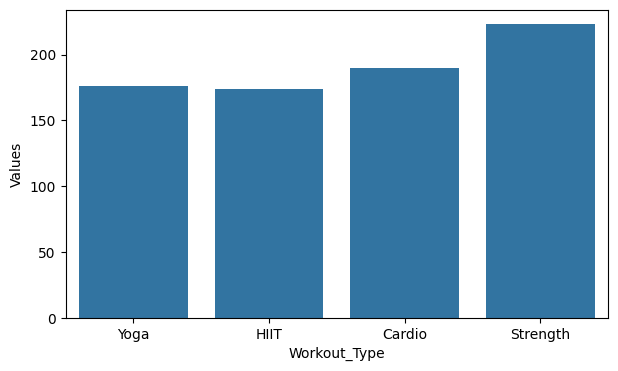

In [16]:

plt.figure(figsize=(7, 4))
sns.countplot(
    data=gym_data,
    x="Workout_Type",                  
)
plt.title("")
plt.ylabel("Values")
plt.xlabel("Workout_Type")
plt.show()


Histogram Of Male And Female Weight

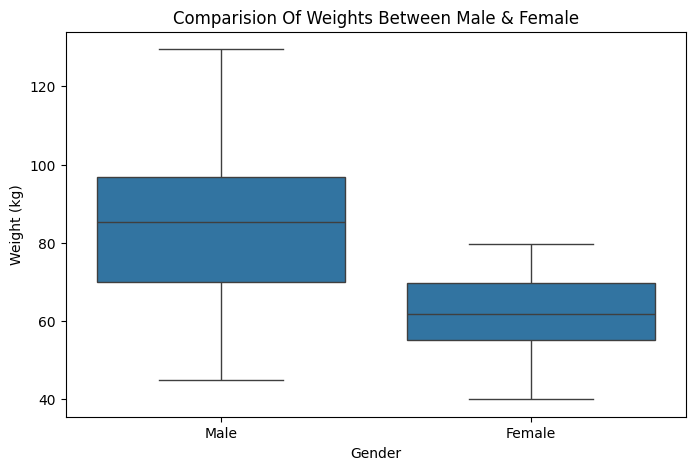

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=gym_data,x="Gender",y="Weight (kg)")
plt.title("Comparision Of Weights Between Male & Female")
plt.show()

Observation:

1.Male Has More Weight than Female

2.The Mean Weight Of Male is the Approximately the Max Weight Of Female


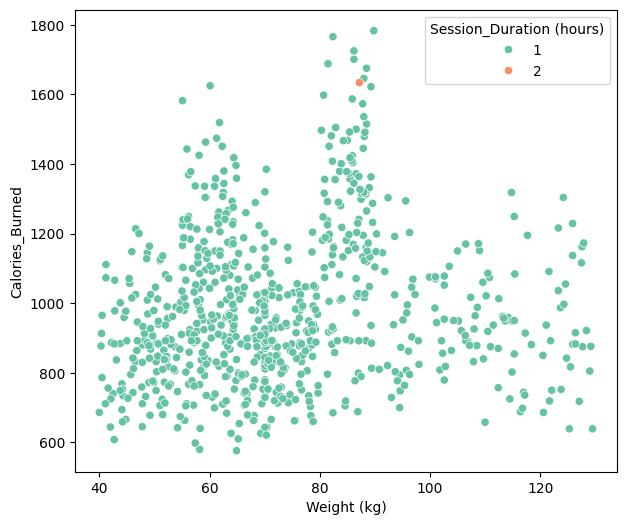

In [18]:

plt.figure(figsize=(7,6))
sns.scatterplot(x="Weight (kg)",y="Calories_Burned",data=gym_data,palette="Set2",hue="Session_Duration (hours)")
plt.show()

Observation:

1.Only 1 Person Workout For =>2hrs in this Data

2.Mostly People Burned 800-1200 Calories

3.People with Weight >80 have Burned More Calories Than Other


Pie Chart Of BMI Categories

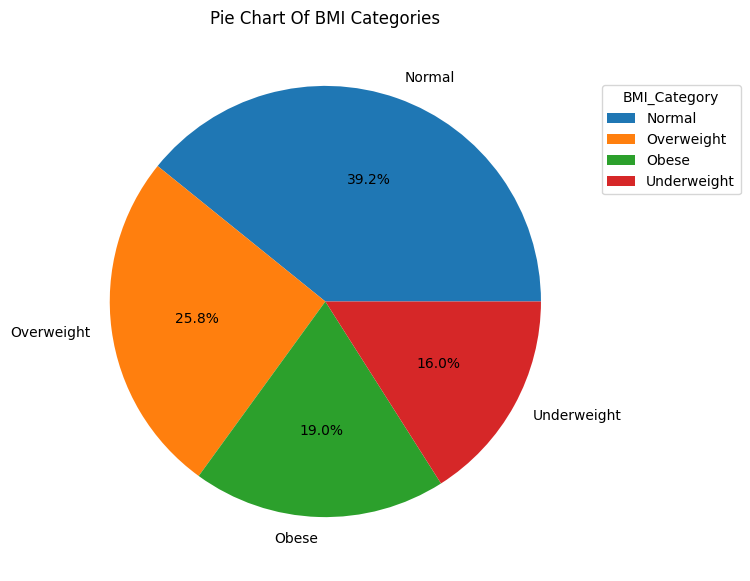

In [19]:
bmi_counts=gym_data["BMI_Category"].value_counts()
plt.figure(figsize=(10,7))
plt.pie(bmi_counts,labels=bmi_counts.index,autopct="%1.1f%%")
plt.title("Pie Chart Of BMI Categories")
plt.legend(title="BMI_Category",loc="center left",bbox_to_anchor=(1.0,0.8))
plt.show()

Observation:

Most People Have Normal BMI

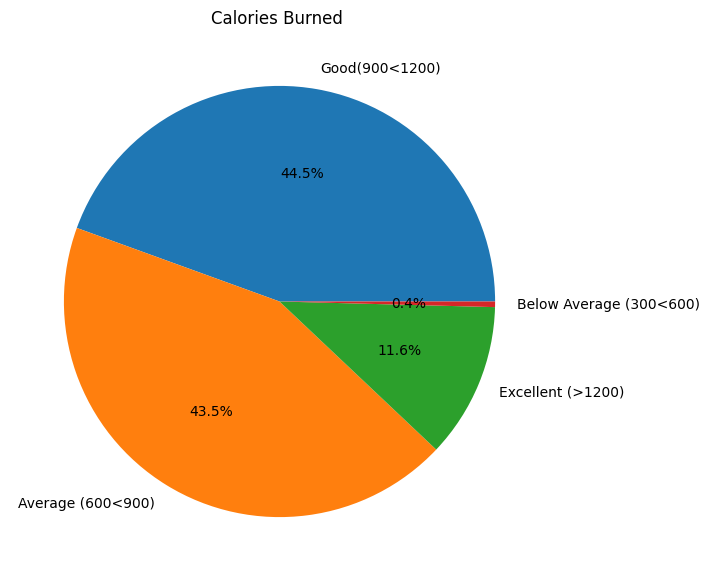

In [20]:
bins=[300,600,900,1200,1400]

labels=["Below Average (300<600)","Average (600<900)","Good(900<1200)","Excellent (>1200)"]

gym_data["Calories_Category"]=pd.cut(gym_data["Calories_Burned"],bins=bins,labels=labels)

calories_category=gym_data["Calories_Category"].value_counts()

plt.figure(figsize=(10,7))
plt.pie(calories_category,labels=calories_category.index,autopct="%1.1f%%")
plt.title("Calories Burned ")
plt.show()

Observation:

1. Only 0.4% Have Burned 300-600 Calories
2. 88% People Have Burned 600-1200 Calories
3. 11.6% Have Burned More Than 1200 Calories

Correlation Heatmap of Gym Dataset

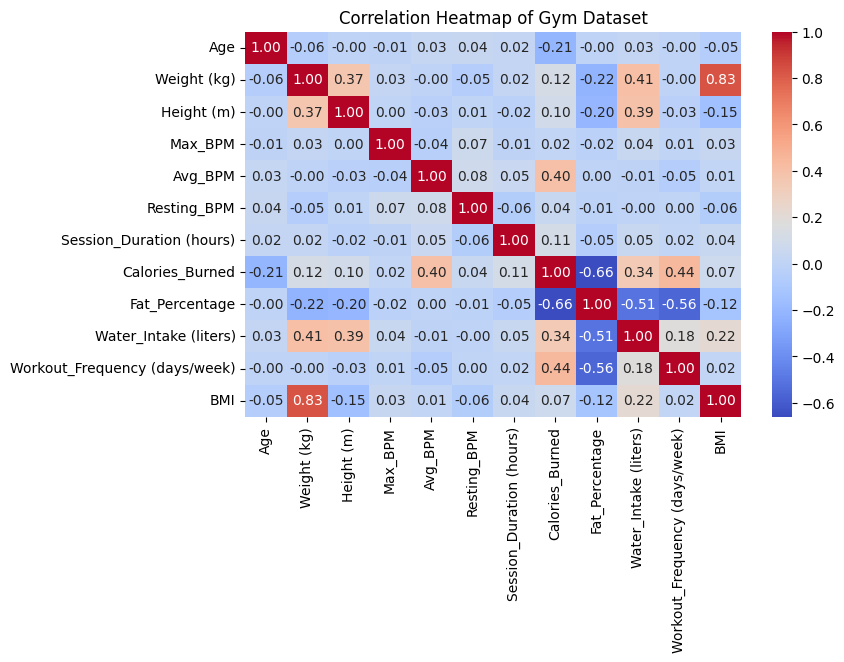

In [21]:

numeric_cols = gym_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Gym Dataset")
plt.show()



Observations:

1. People With Heavier Weight Intakes More Water
2. People With Avg_BPM Burns More Calories
3. People With More Workout(days/week) Burns More Calories
4. People With More Fat % Burns Less Calories, Intakes Less Water And Workout Less (days/week)
5. Older People Do Less Workout 